In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Madrid .csv")
print(data.head())

          CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0  1997-01-01               7.0                4.0               2.0   
1  1997-01-02               7.0                3.0               0.0   
2  1997-01-03               5.0                3.0               2.0   
3  1997-01-04               7.0                3.0              -1.0   
4  1997-01-05               2.0                0.0              -1.0   

   Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0         5.0             3.0            2.0         100.0            95.0   
1         6.0             3.0            0.0         100.0            92.0   
2         5.0             1.0           -1.0         100.0            85.0   
3        -2.0            -3.0           -4.0          86.0            63.0   
4         2.0             0.0           -3.0         100.0            95.0   

    Min Humidity  ...   Max VisibilityKm   Mean VisibilityKm  \
0           76.0  ...             

In [ ]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [ ]:
figure = px.line(data, x="CET",
                 y="Mean TemperatureC",
                 title='Temperature in Madrid Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="CET", y=" Mean Humidity",
                 title='Humidity in Madrid Over the Years')
figure.show()

In [ ]:
figure = px.line(data, x="CET",  y="Mean Wind SpeedKm/h",
                 title='Wind Speed in Madrid Over the Years')
figure.show()

In [ ]:
figure = px.scatter(data, x=" Mean Humidity",y="Mean TemperatureC", trendline="ols", title = "Relationship Between Temperature and Humidity")
figure.show()

In [ ]:
data["date"] = pd.to_datetime(data["CET"], format = '%Y-%m-%d')
data['year'] = data["date"].dt.year
data["month"] = data["date"].dt.month


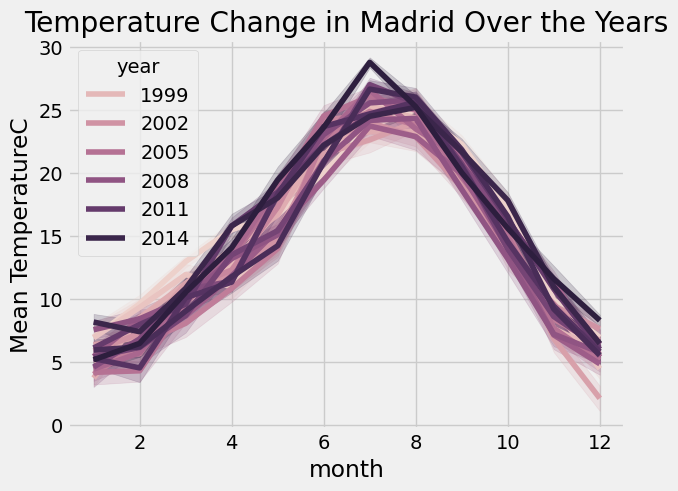

In [ ]:
plt.style.use('fivethirtyeight')
plt.title("Temperature Change in Madrid Over the Years")
sns.lineplot(data = data, x='month', y='Mean TemperatureC', hue='year')
plt.show()

In [ ]:
forecast_data = data.rename(columns = {"CET": "ds",
                                       "Mean TemperatureC": "y"})
print(forecast_data)

              ds  Max TemperatureC     y  Min TemperatureC  Dew PointC  \
0     1997-01-01               7.0   4.0               2.0         5.0   
1     1997-01-02               7.0   3.0               0.0         6.0   
2     1997-01-03               5.0   3.0               2.0         5.0   
3     1997-01-04               7.0   3.0              -1.0        -2.0   
4     1997-01-05               2.0   0.0              -1.0         2.0   
...          ...               ...   ...               ...         ...   
6807  2015-12-27              14.0   7.0              -1.0         6.0   
6808  2015-12-28              15.0   8.0               2.0         8.0   
6809  2015-12-29              11.0   8.0               5.0         9.0   
6810  2015-12-30               9.0   8.0               6.0         7.0   
6811  2015-12-31              12.0  10.0               7.0        10.0   

      MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
0                3.0            2.0       

In [49]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=3650)
forecasts.tail()
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0maqgpsv/y42ykli9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0maqgpsv/aje0ggwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66000', 'data', 'file=/tmp/tmp0maqgpsv/y42ykli9.json', 'init=/tmp/tmp0maqgpsv/aje0ggwu.json', 'output', 'file=/tmp/tmp0maqgpsv/prophet_modelkme1bz3t/prophet_model-20240818175304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:53:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime 